# Jack and Jill

####Classification Tree

Dataset from Salesforce+ Cumulative Report+DSPP: `jack_and_jill.csv` + `CULUMATIVE_BASE`(revamped cumulative database) + `dspp`         
    


In [0]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [0]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [88]:
from google.colab import files
uploaded = files.upload()

Saving latest_input1.csv to latest_input1.csv


In [89]:
# Load the CSV file and check the format
heartData = pd.read_csv('latest_input1.csv')
heartData.head()

,StudyGlobal Booking ID,SumOfStage Duration,SumOf# Calls,SumOf# Emails,Direction,Sub-Region,Class,Intake vs Offer,emailsCallsProduct
0,16595498,816,0,3,Inbound,LAM,Jack,284.0,0
1,16595498,816,0,3,Inbound,LAM,Jack,221.0,0
2,16595498,816,0,3,Inbound,LAM,Jill,117.0,0
3,16595498,9520,7,0,Outbound,LAM,Jack,284.0,0
4,16595498,9520,7,0,Outbound,LAM,Jack,221.0,0


Check the vital statistics of the dataset using the `type` and `shape` attributes.     
Check the variables (and their types) in the dataset using the `info()` method.

In [90]:
print("Data type : ", type(heartData))
print("Data dims : ", heartData.shape)
heartData.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1823, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 9 columns):
StudyGlobal Booking ID    1823 non-null int64
SumOfStage Duration       1823 non-null int64
SumOf# Calls              1823 non-null int64
SumOf# Emails             1823 non-null int64
Direction                 1823 non-null object
Sub-Region                1780 non-null object
Class                     1823 non-null object
Intake vs Offer           1761 non-null float64
emailsCallsProduct        1823 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 128.3+ KB


### Format the Dataset

Convert the columns of type `object` to categorical data (factor) format.   
Convert the non-obvious *categorical* columns to `category` format as well.    

Check the format and vital statistics of the modified dataframe.     

In [91]:

# Drop the rows with `NA` values
heartData = heartData.dropna()

# Convert the Categoricals to appropriate type
heartData["StudyGlobal Booking ID"] = heartData["StudyGlobal Booking ID"].astype('category')
heartData["Direction"] = heartData["Direction"].astype('category')
heartData["Sub-Region"] = heartData["Sub-Region"].astype('category')
heartData["Class"] = heartData["Class"].astype('category')


# Check the modified dataset
heartData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1822
Data columns (total 9 columns):
StudyGlobal Booking ID    1721 non-null category
SumOfStage Duration       1721 non-null int64
SumOf# Calls              1721 non-null int64
SumOf# Emails             1721 non-null int64
Direction                 1721 non-null category
Sub-Region                1721 non-null category
Class                     1721 non-null category
Intake vs Offer           1721 non-null float64
emailsCallsProduct        1721 non-null int64
dtypes: category(4), float64(1), int64(4)
memory usage: 137.0 KB


In [0]:
#heartData.to_csv("new_sheet.csv")

In [0]:
#files.download("new_sheet.csv")

---

## Classification Tree : Generic Function

Let us write a generic function to model Classification Tree, as before.      
Our Predictor variable(s) will be $X$ and the Response variable will be $Y$.   

> Train data : (`X_Train`, `y_train`)    
> Test data : (`X_test`, `y_test`)

In [0]:
def modelDecisionTree(X_train, y_train, X_test, y_test, tree_depth):
    '''
        Function to perform Linear Regression with X_Train, y_train,
        and test out the performance of the model on X_Test, y_test.
    '''    
    dectree = DecisionTreeClassifier(max_depth = tree_depth)  # create the decision tree object
    dectree.fit(X_train, y_train)                             # train the decision tree model

    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Visualize the Classification Tree model
    f = plt.figure(figsize=(16, 8))
    plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = ["Jack", "Jill"], 
          filled = True,
          rounded = True)
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()
    
    # Confusion Matrix
    y_labels = ['Jack', 'Jill']
    f, axes = plt.subplots(1, 2, figsize=(16, 6))
    sb.heatmap(confusion_matrix(y_train, y_train_pred, y_labels),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred, y_labels), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
                
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('Actual labels')
    axes[0].xaxis.set_ticklabels(y_labels)
    axes[0].yaxis.set_ticklabels(y_labels)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')
    axes[1].xaxis.set_ticklabels(y_labels)
    axes[1].yaxis.set_ticklabels(y_labels)

    axes[0].set_ylim(len(y_labels), 0)  # temporary fix for heatmap
    axes[1].set_ylim(len(y_labels), 0)  # temporary fix for heatmap
    
    plt.show()

---

##  Classification Tree

Let us set up a Multi-Variate Classification problem.   

Response Variable : **Class**     
Predictor Feature : **Stage Duration, Calls, Emails, Direction, Sub-region, Intake vs Offer, {Emails x Calls}(derived)**       


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1822
Data columns (total 10 columns):
StudyGlobal Booking ID    1721 non-null category
SumOfStage Duration       1721 non-null int64
SumOf# Calls              1721 non-null int64
SumOf# Emails             1721 non-null int64
Direction                 1721 non-null category
Sub-Region                1721 non-null category
Class                     1721 non-null category
Intake vs Offer           1721 non-null float64
emailsCallsProduct        1721 non-null int64
encDirection              1721 non-null int64
dtypes: category(4), float64(1), int64(5)
memory usage: 150.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1822
Data columns (total 11 columns):
StudyGlobal Booking ID    1721 non-null category
SumOfStage Duration       1721 non-null int64
SumOf# Calls              1721 non-null int64
SumOf# Emails             1721 non-null int64
Direction                 1721 non-null category
Sub-Region 

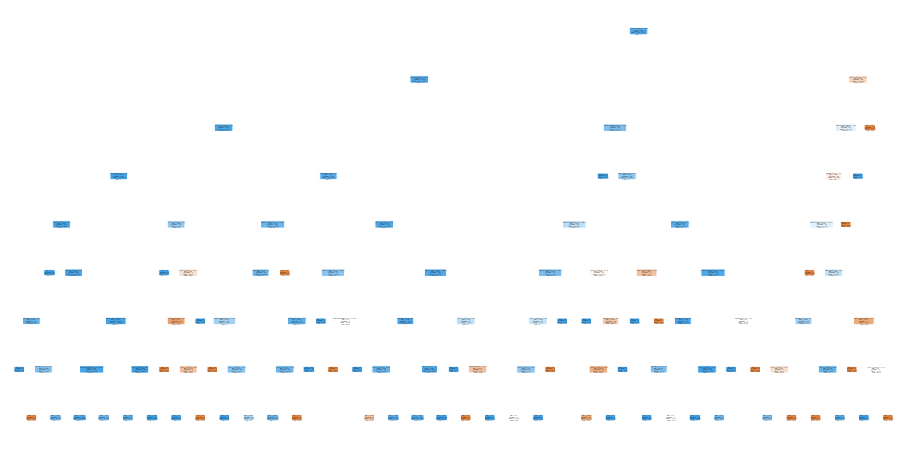

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9310631229235881

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8994197292069632



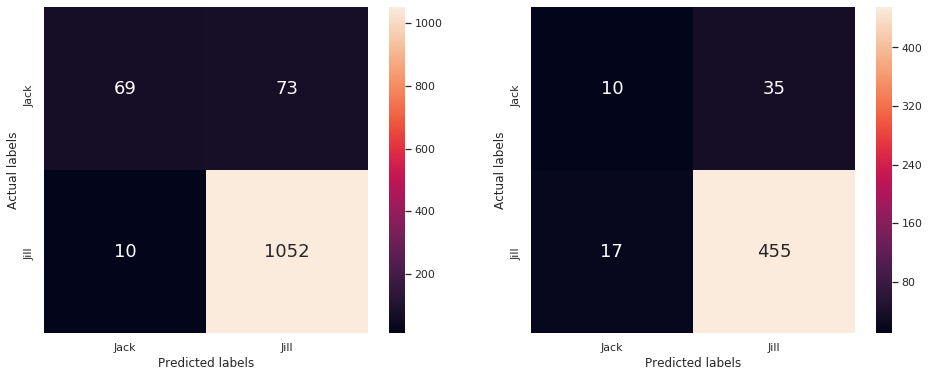

In [93]:
# Pre-process the Categorical Predictor(s)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

leCP = LabelEncoder()
leCP.fit(heartData["Direction"])
heartData["encDirection"] = leCP.transform(heartData["Direction"])
heartData.info()

leTH = LabelEncoder()
leTH.fit(heartData["Sub-Region"])
heartData["encSub-Region"] = leTH.transform(heartData["Sub-Region"])
heartData.info()



# Specify the Predictors and Response
response = "Class"
predictors = ["SumOfStage Duration", "SumOf# Calls","SumOf# Emails","encDirection" ,"encSub-Region","Intake vs Offer","emailsCallsProduct"]

# Extract Response and Predictors
y = pd.DataFrame(heartData[response])
X = pd.DataFrame(heartData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


# Model Classification Tree with Train-Test
modelDecisionTree(X_train, y_train, X_test, y_test, 8)


---

## Prediction using a Classification Tree Model

Once we have trained a Classification Tree Model, we may use it to predict the Response.   

In [100]:
# Pre-process the Categorical Predictor(s)
from sklearn.preprocessing import LabelEncoder
leCP = LabelEncoder()
leCP.fit(heartData["Direction"])
heartData["encDirection"] = leCP.transform(heartData["Direction"])


leTH = LabelEncoder()
leTH.fit(heartData["Sub-Region"])
heartData["encSub-Region"] = leTH.transform(heartData["Sub-Region"])



# Specify the Predictors and Response
response = "Class"
predictors = ["SumOfStage Duration", "SumOf# Calls","SumOf# Emails","encDirection" ,"encSub-Region","Intake vs Offer","emailsCallsProduct"]

# Extract Response and Predictors
y = pd.DataFrame(heartData[response])
X = pd.DataFrame(heartData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Model Classification Tree with Train-Test
dectree = DecisionTreeClassifier(max_depth = 8)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Predict Response corresponding to Predictors

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Let's predict the value of Response for a few specific Data Points -- using the Classification Tree derived above.   

In [96]:
# Extract random Data Points for Prediction
heartData_pred = heartData.sample(5)
heartData_pred

,StudyGlobal Booking ID,SumOfStage Duration,SumOf# Calls,SumOf# Emails,Direction,Sub-Region,Class,Intake vs Offer,emailsCallsProduct,encDirection,encSub-Region
102,16309349,1475,5,0,Outbound,W China,Jack,82.0,0,1,29
1596,17149775,2201,2,29,Inbound,Middle East,Jill,265.0,58,0,13
286,27792443,1728,20,4,Outbound,W China,Jill,22.0,80,1,29
603,22932048,1467,0,9,Inbound,N China,Jill,39.0,0,0,14
197,15188116,648,0,2,Inbound,N China,Jill,110.0,0,0,14


In [97]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(heartData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Jill', 'Jill', 'Jill', 'Jill', 'Jill'], dtype=object)

### Prediction Accuracy

Let us check the errors in the Predicted values, compared to the Actuals.

In [98]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["Predicted"], index = heartData_pred.index)
heartData_acc = pd.concat([heartData_pred[response], y_pred], axis = 1)

y_correct = (heartData_acc[response] == heartData_acc["Predicted"])
y_correct = pd.DataFrame(list(y_correct), columns = ["Correct"], index = heartData_pred.index)
heartData_acc = pd.concat([heartData_acc, y_correct], axis = 1)

heartData_acc

,Class,Predicted,Correct
102,Jack,Jill,False
1596,Jill,Jill,True
286,Jill,Jill,True
603,Jill,Jill,True
197,Jill,Jill,True


### Prediction Probability

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [99]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(heartData_pred[predictors])

# Predict Response Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
y_prob

array([[0.05564142, 0.94435858],
       [0.13747646, 0.86252354],
       [0.05564142, 0.94435858],
       [0.05564142, 0.94435858],
       [0.05564142, 0.94435858]])

The confidence of predicting any class essentially depends on the predicted probability and a threshold (default 0.5).

In [73]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["Confidence"], index = heartData_pred.index)
heartData_conf = pd.concat([heartData_acc, y_prob], axis = 1)

heartData_conf

,Success,Predicted,Correct,Confidence
1691,Jill,Jill,True,0.916206
1130,Jill,Jill,True,0.916206
964,Jill,Jill,True,0.916206
66,Jill,Jill,True,0.916206
573,Jill,Jill,True,0.916206


*NOTE : You can always go back and try fitting a model with more predictors to check the difference.*

In [0]:
s=[50,60,65,35,90]
a= [25,30,30,20,40]